In [59]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import glob

In [79]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times'

In [80]:
# load simulate data
param_file = 'Input_Params.csv'
params = pd.read_csv(param_file)
params.head()

,power,speed,r
0,0.20,0.002117,0.23
1,0.20,0.004233,0.23
2,0.20,0.006350,0.23
3,0.20,0.008467,0.23
4,0.25,0.004233,0.27


In [132]:
path = 'output_stm/'
files = glob.glob(path+ '*.csv')

data=[]
for file in files:
    df = pd.read_csv(file)
    data.append(df)

In [133]:
simulate_geo_data = pd.DataFrame(columns=data[0].columns)

# save the last row from data to simulate_geo_data
for d in data:
    simulate_geo_data=simulate_geo_data.append(d.iloc[-1], ignore_index=True)

In [134]:
# round power and speed values
simulate_geo_data['pp_power'] = simulate_geo_data['pp_power'].apply(lambda x : round(x, 2)) # round to 2 decimal points
simulate_geo_data['pp_speed'] = simulate_geo_data['pp_speed'].apply(lambda x : round(x, 6)) # round to 6 decimal points

In [135]:
# add column of experimentally measureable data
simulate_geo_data['CrownHeight(mm)']=simulate_geo_data['bead_z_coord_max']-simulate_geo_data['bead_z_coord_min']
simulate_geo_data['CrownLength(mm)']=simulate_geo_data['bead_y_coord_max']-simulate_geo_data['bead_y_coord_min']
simulate_geo_data['CrownWidth(mm)']=simulate_geo_data['bead_x_coord_max']-simulate_geo_data['bead_x_coord_min']
simulate_geo_data['CrownArea(mm2)']=simulate_geo_data['bead_volume']/(simulate_geo_data['CrownLength(mm)'])

simulate_geo_data['MeltZoneHeight(mm)']=simulate_geo_data['melt_z_coord_max']-simulate_geo_data['melt_z_coord_min']
simulate_geo_data['MeltZoneLength(mm)']=simulate_geo_data['melt_y_coord_max']-simulate_geo_data['melt_y_coord_min']
simulate_geo_data['MeltZoneWidth(mm)']=simulate_geo_data['melt_x_coord_max']-simulate_geo_data['melt_x_coord_min']
simulate_geo_data['MeltZoneArea(mm2)']=simulate_geo_data['melt_volume']/(simulate_geo_data['MeltZoneLength(mm)'])

In [136]:
simulate_geo_data=simulate_geo_data.sort_values(by=['pp_power','pp_speed'], ascending=[True, True])

In [137]:
simulate_geo_data

,time,bead_max_temperature,bead_min_temperature,bead_volume,bead_x_coord_max,bead_x_coord_min,bead_y_coord_max,bead_y_coord_min,bead_z_coord_max,bead_z_coord_min,...,pp_power,pp_speed,CrownHeight(mm),CrownLength(mm),CrownWidth(mm),CrownArea(mm2),MeltZoneHeight(mm),MeltZoneLength(mm),MeltZoneWidth(mm),MeltZoneArea(mm2)
15,1889.760804,2701.341461,446.088951,2.903437,0.600,-0.600,2.50,-2.250,1.9,1.0,...,0.20,0.002117,0.9,4.750,1.20,0.611250,0.30,4.350,0.75,0.106175
9,944.882634,2634.557871,460.937557,1.798875,0.500,-0.500,2.35,-2.100,1.6,1.0,...,0.20,0.004233,0.6,4.450,1.00,0.404242,0.25,4.200,0.65,0.080666
8,629.921260,2512.336271,410.787271,1.223094,0.400,-0.400,2.25,-2.025,1.6,1.0,...,0.20,0.006350,0.6,4.275,0.80,0.286104,0.25,4.150,0.55,0.055655
6,472.440759,2369.416854,386.374333,0.717062,0.350,-0.350,2.15,-2.025,1.5,1.0,...,0.20,0.008467,0.5,4.175,0.70,0.171751,0.20,4.100,0.45,0.037607
12,944.882634,2687.769234,494.602368,2.508516,0.600,-0.600,2.50,-2.050,1.8,1.0,...,0.25,0.004233,0.8,4.550,1.20,0.551322,0.40,4.350,0.80,0.124253
2,629.921260,2554.132040,435.863895,1.660672,0.500,-0.500,2.40,-2.025,1.7,1.0,...,0.25,0.006350,0.7,4.425,1.00,0.375293,0.30,4.250,0.65,0.082081
11,472.440759,2347.330727,416.720608,1.188672,0.425,-0.425,2.30,-2.000,1.6,1.0,...,0.25,0.008467,0.6,4.300,0.85,0.276435,0.25,4.200,0.55,0.061347
7,377.953946,2218.735024,396.011347,0.696562,0.350,-0.350,2.20,-2.000,1.5,1.0,...,0.25,0.010583,0.5,4.200,0.70,0.165848,0.20,4.150,0.45,0.037244
1,629.921260,2674.409478,483.320943,2.194562,0.550,-0.550,2.50,-2.025,1.8,1.0,...,0.30,0.006350,0.8,4.525,1.10,0.484986,0.30,4.300,0.80,0.123132
4,472.440759,2492.020348,443.432401,1.534359,0.500,-0.500,2.40,-2.000,1.6,1.0,...,0.30,0.008467,0.6,4.400,1.00,0.348718,0.30,4.225,0.65,0.085777


In [138]:
power_vals = simulate_geo_data['pp_power'].unique()
speed_vals = simulate_geo_data['pp_speed'].unique()
print(power_vals)
print(speed_vals)

[0.2  0.25 0.3  0.35]
[0.002117 0.004233 0.00635  0.008467 0.010583 0.0127   0.014817]


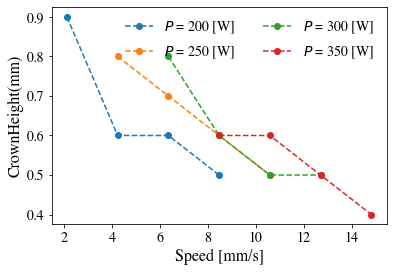

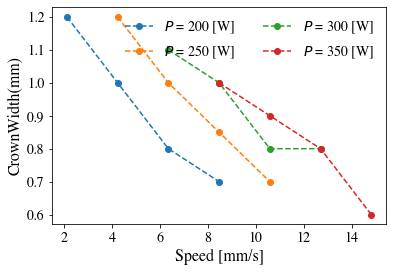

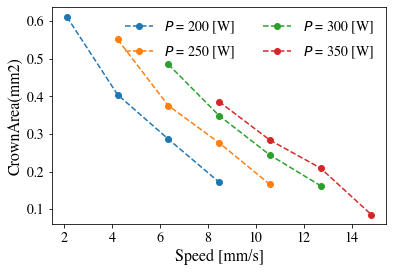

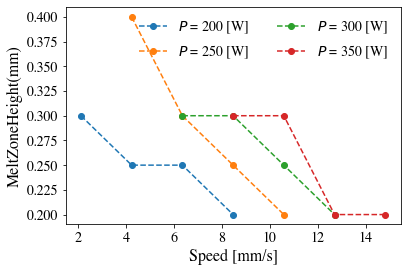

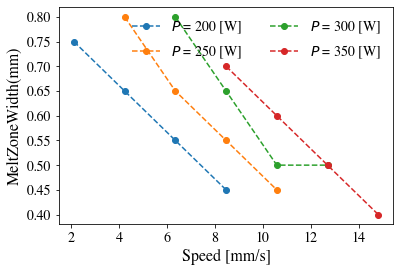

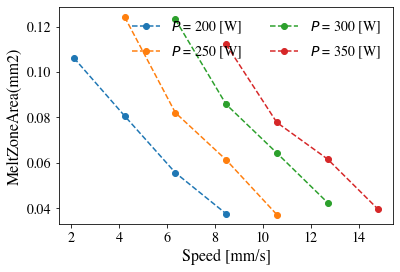

In [143]:
for col in simulate_geo_data.columns[-8:]:
    if (col not in ['pp_power', 'pp_speed', 'time','CrownLength(mm)','MeltZoneLength(mm)']):
        plt.figure()
        for p in power_vals:
            temp = simulate_geo_data.loc[simulate_geo_data['pp_power'] == p]
            plt.plot(temp['pp_speed']*1000, temp[col], '--o', label = '$P$ = '+"{:.0f}".format(p*1000)+' [W]')

#             plt.xlim([0,16])
#             plt.ylim([0, 0.7])
            plt.ylabel(col,fontsize=16)
            plt.xlabel('Speed [mm/s]',fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.legend(frameon=False, fontsize=14, ncol = 2)

In [28]:
new_data = data[0].iloc[-1]
new_data

time                     314.960630
bead_max_temperature    2231.088612
bead_min_temperature     402.901580
bead_volume                0.681375
bead_x_coord_max           0.400000
bead_x_coord_min          -0.400000
bead_y_coord_max           2.200000
bead_y_coord_min          -2.000000
bead_z_coord_max           1.500000
bead_z_coord_min           1.000000
melt_volume                0.174313
melt_x_coord_max           0.250000
melt_x_coord_min          -0.250000
melt_y_coord_max           2.100000
melt_y_coord_min          -2.000000
melt_z_coord_max           1.000000
melt_z_coord_min           0.800000
pp_power                   0.300000
pp_speed                   0.012700
Name: 45, dtype: float64

In [15]:
for i in range(len(params)):
    power = params['power'].loc[i]
    v=params['speed'].loc[i]
    r=params['r'].loc[i]
    dt = 0.3*r/v
    fname = 'output_stm/Line_master_speed_'+str(v)+'_power_'+str(power)+'_r_'+str(r)+'_dt_'+str(dt)+'.csv'
    print(fname)

output_stm/Line_master_speed_0.002116667_power_0.2_r_0.23_dt_32.59842006324094.csv
output_stm/Line_master_speed_0.004233333_power_0.2_r_0.23_dt_16.299213881827868.csv
output_stm/Line_master_speed_0.00635_power_0.2_r_0.23_dt_10.866141732283467.csv
output_stm/Line_master_speed_0.008466667_power_0.2_r_0.23_dt_8.149605978361969.csv
output_stm/Line_master_speed_0.004233333_power_0.25_r_0.27_dt_19.13385977431967.csv
output_stm/Line_master_speed_0.00635_power_0.25_r_0.27_dt_12.755905511811024.csv
output_stm/Line_master_speed_0.008466667_power_0.25_r_0.27_dt_9.56692875720753.csv
output_stm/Line_master_speed_0.010583333_power_0.25_r_0.27_dt_7.653543548143104.csv
output_stm/Line_master_speed_0.00635_power_0.3_r_0.3_dt_14.173228346456693.csv
output_stm/Line_master_speed_0.008466667_power_0.3_r_0.3_dt_10.629920841341699.csv
output_stm/Line_master_speed_0.010583333_power_0.3_r_0.3_dt_8.50393727571456.csv
output_stm/Line_master_speed_0.0127_power_0.3_r_0.3_dt_7.086614173228346.csv
output_stm/Line_ma

In [3]:
fname = 'LENS_database_unit.csv'
df=pd.read_csv(fname)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.head()

,Laser(kW),Speed(mm/ms),FeedRate(g/ms),CrownHeight(mm),MaxCrownHeight(mm),MeltZoneHeight(mm),CrownWidth(mm),MeltZoneWidth(mm),CrownArea(mm2),MeltZoneArea(mm2),TotalArea(mm2)
0,0.2,0.002117,0.000031,0.097000,0.080,0.066,0.552000,0.501,0.026076,0.021274,0.047350
1,0.2,0.004233,0.000031,0.039333,0.039,0.061,0.505000,0.491,0.013923,0.019085,0.033008
2,0.2,0.006350,0.000031,0.025000,0.020,0.056,0.396000,0.463,0.005594,0.017741,0.023335
3,0.2,0.008467,0.000031,0.011667,0.009,0.049,0.459000,0.438,0.002451,0.014112,0.016563
4,0.2,0.002117,0.000062,0.151000,0.138,0.059,0.517333,0.528,0.059116,0.020580,0.079696


In [5]:
# add laser spot size info [kW -> mm]
power_r = {0.4:0.37, 0.35:0.33, 0.3:0.3, 0.25:0.27, 0.2:0.23}

df['LaserSpotSize(mm)'] = df['Laser(kW)'].apply(lambda x: power_r[x]) 

In [6]:
df.head()

,Laser(kW),Speed(mm/ms),FeedRate(g/ms),CrownHeight(mm),MaxCrownHeight(mm),MeltZoneHeight(mm),CrownWidth(mm),MeltZoneWidth(mm),CrownArea(mm2),MeltZoneArea(mm2),TotalArea(mm2),LaserSpotSize(mm)
0,0.2,0.002117,0.000031,0.097000,0.080,0.066,0.552000,0.501,0.026076,0.021274,0.047350,0.23
1,0.2,0.004233,0.000031,0.039333,0.039,0.061,0.505000,0.491,0.013923,0.019085,0.033008,0.23
2,0.2,0.006350,0.000031,0.025000,0.020,0.056,0.396000,0.463,0.005594,0.017741,0.023335,0.23
3,0.2,0.008467,0.000031,0.011667,0.009,0.049,0.459000,0.438,0.002451,0.014112,0.016563,0.23
4,0.2,0.002117,0.000062,0.151000,0.138,0.059,0.517333,0.528,0.059116,0.020580,0.079696,0.23


In [7]:
# find unique laser, speed, feed rate

power = df['Laser(kW)'].unique()
speed = df['Speed(mm/ms)'].unique()
feed_rate = df['FeedRate(g/ms)'].unique()
print('Power :', power)
print('Speed :', speed)
print('Feed rate :', feed_rate)

Power : [0.2  0.25 0.3  0.35 0.4 ]
Speed : [0.00211667 0.00423333 0.00635    0.00846667 0.00508    0.01058333
 0.0127     0.01481667 0.01693333]
Feed rate : [3.10e-05 6.20e-05 1.24e-04 2.48e-04 3.72e-04 1.55e-04 3.10e-04 4.65e-04]


In [8]:
df3 = df.loc[df['FeedRate(g/ms)'] == feed_rate[3]]
df3

,Laser(kW),Speed(mm/ms),FeedRate(g/ms),CrownHeight(mm),MaxCrownHeight(mm),MeltZoneHeight(mm),CrownWidth(mm),MeltZoneWidth(mm),CrownArea(mm2),MeltZoneArea(mm2),TotalArea(mm2),LaserSpotSize(mm)
12,0.20,0.002117,0.000248,0.601667,0.645,0.000,0.610000,0.421,0.319289,0.000000,0.319289,0.23
13,0.20,0.004233,0.000248,0.303333,0.329,0.020,0.471667,0.432,0.115481,0.003554,0.119035,0.23
14,0.20,0.006350,0.000248,0.198000,0.193,0.000,0.417667,0.385,0.065832,0.000000,0.065832,0.23
15,0.20,0.008467,0.000248,0.105000,0.069,0.015,0.397667,0.391,0.012652,0.002597,0.015249,0.23
25,0.25,0.004233,0.000248,0.427667,0.413,0.107,0.683667,0.625,0.246145,0.049791,0.295936,0.27
26,0.25,0.006350,0.000248,0.301333,0.275,0.112,0.599667,0.561,0.140069,0.039593,0.179662,0.27
27,0.25,0.008467,0.000248,0.242667,0.236,0.109,0.598000,0.577,0.109759,0.041999,0.151758,0.27
28,0.25,0.010583,0.000248,0.152333,0.147,0.092,0.568333,0.551,0.060487,0.036718,0.097205,0.27
41,0.30,0.006350,0.000248,0.358667,0.334,0.197,0.700333,0.644,0.175658,0.084602,0.260260,0.30
42,0.30,0.008467,0.000248,0.227667,0.236,0.179,0.688667,0.648,0.136300,0.081689,0.217989,0.30


In [9]:
power = df3['Laser(kW)'].unique()
print(power)

[0.2  0.25 0.3  0.35]


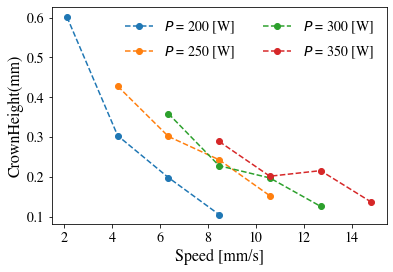

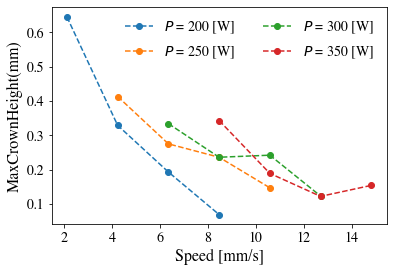

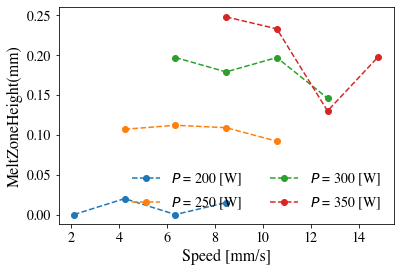

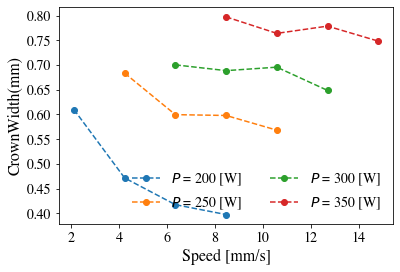

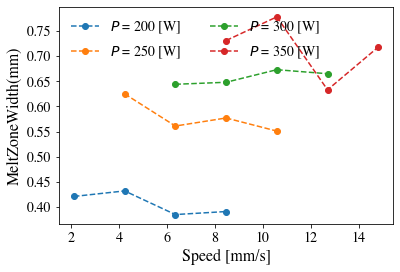

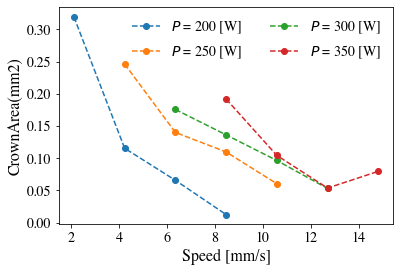

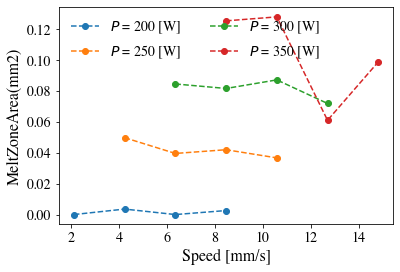

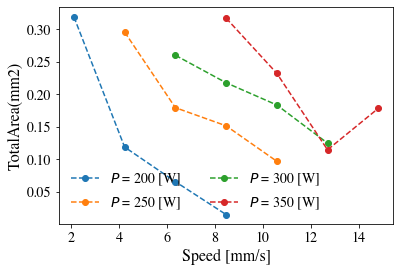

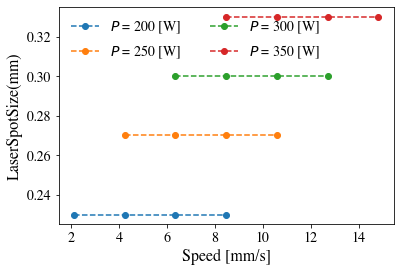

In [10]:
for col in df3.columns:
    if (col not in ['Laser(kW)', 'Speed(mm/ms)', 'FeedRate(g/ms)']):
        plt.figure()
        for p in power:
            temp = df3.loc[df3['Laser(kW)'] == p]
            plt.plot(temp['Speed(mm/ms)']*1000, temp[col], '--o', label = '$P$ = '+"{:.0f}".format(p*1000)+' [W]')

#             plt.xlim([0,16])
#             plt.ylim([0, 0.7])
            plt.ylabel(col,fontsize=16)
            plt.xlabel('Speed [mm/s]',fontsize=16)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.legend(frameon=False, fontsize=14, ncol = 2)

In [11]:
df3.to_csv('Input_Params.csv',index=False, columns = ['Laser(kW)', 'Speed(mm/ms)', 'LaserSpotSize(mm)'])

In [12]:
df3=df3.rename(columns={'Laser(kW)':'power', 'Speed(mm/ms)':'speed', 'LaserSpotSize(mm)':'r'})
df3.head()

,power,speed,FeedRate(g/ms),CrownHeight(mm),MaxCrownHeight(mm),MeltZoneHeight(mm),CrownWidth(mm),MeltZoneWidth(mm),CrownArea(mm2),MeltZoneArea(mm2),TotalArea(mm2),r
12,0.20,0.002117,0.000248,0.601667,0.645,0.000,0.610000,0.421,0.319289,0.000000,0.319289,0.23
13,0.20,0.004233,0.000248,0.303333,0.329,0.020,0.471667,0.432,0.115481,0.003554,0.119035,0.23
14,0.20,0.006350,0.000248,0.198000,0.193,0.000,0.417667,0.385,0.065832,0.000000,0.065832,0.23
15,0.20,0.008467,0.000248,0.105000,0.069,0.015,0.397667,0.391,0.012652,0.002597,0.015249,0.23
25,0.25,0.004233,0.000248,0.427667,0.413,0.107,0.683667,0.625,0.246145,0.049791,0.295936,0.27


In [13]:
df3.to_csv('/Users/yushd/projects/moose_AM/modules/combined/Line_Build_Validation_Real_Geometry/Input_Params.csv',index=False, columns = ['power', 'speed', 'r'])

[-4.82560118  9.28815629 -5.27998721  0.96682126]


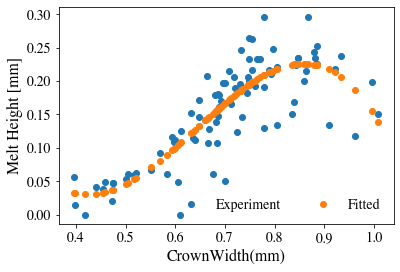

In [14]:
# get relation between bead width and met height
plt.figure()
x=df['CrownWidth(mm)'];
y=df['MeltZoneHeight(mm)'];
result = np.polyfit(x,y, 3) # full=True) 

predict = np.poly1d(result)

y_fit = predict(x)

print(result)

# y_fit = []
# for i in x:
#     y_fit.append(a*i + b)
    
plt.plot(x,y,'o', label='Experiment')
plt.plot(x, y_fit,'o', label='Fitted') 

plt.xlabel('CrownWidth(mm)',fontsize=16)
plt.ylabel('Melt Height [mm]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=False, fontsize=14, ncol = 2)